### Contagem das palavras mais usadas no Plano de governo do Partido Novo

#### Importacao de bibliotecas

In [26]:
import pandas as pd
import numpy as np
# http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk import *
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Link do plano de governo

- [Plano de governo](http://joaoamoedo.com.br/programa-de-governo/)

### Conversao pdf to text

- Utilizei esse site on-line [https://pdftotext.com/](https://pdftotext.com/)

### Leitura do arquivo transformado em texto do original em pdf

In [2]:
with open('text/plano_governo_mdb.txt', 'r', encoding='UTF-8') as pl:
    big_string = ''
    for line in pl:
        split_line = line.split(' ')
        for word in split_line:
            big_string = big_string + ' ' + word

In [3]:
# criacao de lista de simbolos de pontuacao
punctuation = string.punctuation

In [4]:
# removendo quebras de linha '\n'
big_string = big_string.replace('\n ', ' ')

In [5]:
# retirando pontuacao
for p in punctuation:
    big_string = big_string.replace(p, '')

In [6]:
# convertendo tudo para lower case
big_string = big_string.lower()

In [7]:
# checando a conversao
big_string[0:1000]

' pacto pela confiança programa de governo da coligação “essa é a solução”  15  \x0c15  de nada adianta lutar pelos nossos sonhos se não confiamos que um dia eles se tornarão realidade confiar em nós mesmos é o ponto de partida para tudo a confiança conecta os diferentes constrói pontes de entendimento e rompe os preconceitos a paz só é alcançada quando os homens confiam uns nos outros o desenvolvimento econômico só acontece quando os consumidores confiam no país a democracia só se fortalece quando confiamos nas instituições valores tão presentes em nós brasileiros foram moldados na confiança tolerância liberdade respeito e diálogo só existem quando confiamos uns nos outros o brasil precisa de um pacto de confiança para superar as divisões políticas dos últimos anos e voltar a se desenvolver e crescer a candidatura de henrique meirelles a presidente do brasil está ancorada nesse pacto que resgatará o espírito de confiança no brasil para atender a cinco prioridades da nossa nação um bra

In [8]:
# comprimento da string
len(big_string)

23336

In [9]:
# nltk.download() # rodar apenas uma vez para baixar os pacotes

In [10]:
# lista de stopwords em portugues
stop_words = stopwords.words('portuguese')

In [11]:
# numero de stopwords
len(stop_words)

203

In [57]:
# aparando os detalhes
full_text = big_string
for s_word in stop_words:
    s_word = ' ' + s_word + ' '
    full_text = full_text.replace(s_word, ' ')
    full_text = full_text.replace(' é ', ' ')
    full_text = full_text.replace(' – ', ' ')
    full_text = full_text.replace(' • ', ' ')
    full_text = full_text.replace('2016', '')
    full_text = full_text.replace('2017', '')
    full_text = full_text.replace('\x0c15', '')

In [58]:
# tamanho do texto apos limpeza
len(full_text)

17915

In [59]:
# quantidade de caracteres removidos
len(big_string)-len(full_text)

5421

In [60]:
# transformando a string em lista
full_text = [full_text]

In [61]:
# separando palavra por palavra
freq_full_text = full_text[0].split(' ')

### Documentacao FreqDist

- [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist)

In [62]:
# Contando a frequencia de cada palavra com a funcao FreqDist
freq_full_text = FreqDist(freq_full_text)

In [63]:
# as 100 palavras mais comuns
hundred_most_common = freq_full_text.most_common(100)
# removendo primeiro elemento da lista ''
hundred_most_common = hundred_most_common[1:]
# imprime as 10 primeiras
hundred_most_common[:29]

[('brasil', 42),
 ('governo', 29),
 ('meirelles', 21),
 ('país', 20),
 ('anos', 16),
 ('infraestrutura', 16),
 ('sistema', 14),
 ('maior', 13),
 ('saúde', 13),
 ('todos', 11),
 ('segurança', 10),
 ('integrado', 9),
 ('pib', 9),
 ('investimento', 9),
 ('confiança', 8),
 ('política', 8),
 ('trabalho', 8),
 ('educação', 8),
 ('federal', 8),
 ('qualidade', 8),
 ('obras', 8),
 ('brasileiros', 7),
 ('forte', 7),
 ('crescimento', 7),
 ('públicos', 7),
 ('serviços', 7),
 ('população', 7),
 ('ser', 7),
 ('recursos', 7)]

In [64]:
# 
x = []
y = []
for i in hundred_most_common[0:29]:
    x.append(i[0])
    y.append(i[1])

In [65]:
d = {'palavra': x, 'frequencia': y}
df_r = pd.DataFrame(d)
df_r = df_r.sort_values(['frequencia'], ascending=0)
df_r

,frequencia,palavra
0,42,brasil
1,29,governo
2,21,meirelles
3,20,país
4,16,anos
5,16,infraestrutura
6,14,sistema
8,13,saúde
7,13,maior
9,11,todos


In [72]:
df_r.frequencia = df_r.frequencia/df_r.loc[0, 'frequencia']

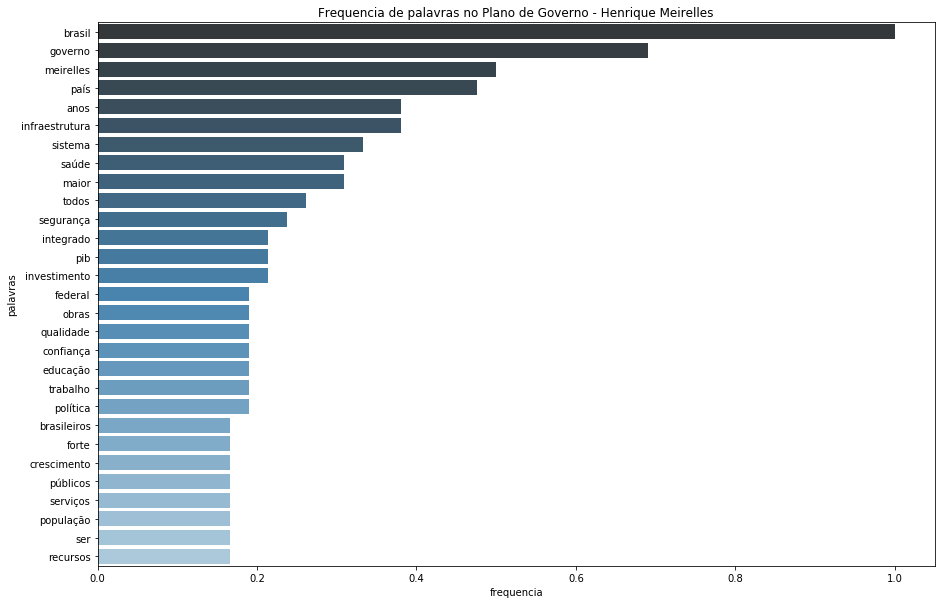

In [73]:
plt.figure(figsize=(15,10))
sns.barplot(df_r.frequencia, df_r.palavra, palette="Blues_d")
plt.title("Frequencia de palavras no Plano de Governo - Henrique Meirelles")
#plt.xticks(rotation=90)
plt.xlabel('frequencia')
plt.ylabel('palavras')
plt.show()

In [67]:
# Lista completa das 100 mais frequentes
hundred_most_common

[('brasil', 42),
 ('governo', 29),
 ('meirelles', 21),
 ('país', 20),
 ('anos', 16),
 ('infraestrutura', 16),
 ('sistema', 14),
 ('maior', 13),
 ('saúde', 13),
 ('todos', 11),
 ('segurança', 10),
 ('integrado', 9),
 ('pib', 9),
 ('investimento', 9),
 ('confiança', 8),
 ('política', 8),
 ('trabalho', 8),
 ('educação', 8),
 ('federal', 8),
 ('qualidade', 8),
 ('obras', 8),
 ('brasileiros', 7),
 ('forte', 7),
 ('crescimento', 7),
 ('públicos', 7),
 ('serviços', 7),
 ('população', 7),
 ('ser', 7),
 ('recursos', 7),
 ('humano', 6),
 ('empregos', 6),
 ('aumentar', 6),
 ('criação', 6),
 ('taxa', 6),
 ('segundo', 6),
 ('setor', 6),
 ('ações', 6),
 ('investimentos', 6),
 ('apenas', 6),
 ('r', 6),
 ('15', 5),
 ('precisa', 5),
 ('henrique', 5),
 ('seguro', 5),
 ('banco', 5),
 ('milhões', 5),
 ('primeiro', 5),
 ('mercado', 5),
 ('pessoas', 5),
 ('idade', 5),
 ('novas', 5),
 ('condições', 5),
 ('forma', 5),
 ('social', 5),
 ('vai', 5),
 ('ensino', 5),
 ('sociedade', 5),
 ('cada', 5),
 ('pública', 5

In [68]:
words = []
for i in hundred_most_common:
    words.append(i[0])
words[:9]

['brasil',
 'governo',
 'meirelles',
 'país',
 'anos',
 'infraestrutura',
 'sistema',
 'maior',
 'saúde']

In [69]:
text = full_text[0].split(' ')
freq_exp = {}
for i in range(len(words)):
    for j in range(len(text)):
        if words[i] == text[j]:
            if text[j-1]:
                if text[j+1] == '':
                    string = text[j-1] + ' ' + text[j] + ' ' + text[j+2]
                else:
                    string = text[j-1] + ' ' + text[j] + ' ' + text[j+1]
                if not string in freq_exp:
                    freq_exp[string] = 1
                else:
                    freq_exp[string] = freq_exp[string] + 1

In [71]:
# lista das expressoes mais frequentes no texto que usam palavras mais frequentes (lista anterior)
for key, value in freq_exp.items():
    if value >=2:
        print(key, value)

governo meirelles vai 5
governo meirelles fará 2
reformar sistema penitenciário 2
brasil humano brasil 2
candidatura henrique meirelles 2
meirelles vai estabelecer 2
100 mil habitantes 2
